In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score,accuracy_score
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
#read data in CSV format
from google.colab import files
import io
 
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['spam.csv']),encoding='latin')
# data = pd.read_csv("C://Users//Shreya//Desktop//Sem 7//Group7A Assignment 2//spam.csv",encoding='latin')	#Change here

Saving spam.csv to spam (3).csv


In [12]:
data.rename(columns={'v1':'Class','v2':'Text'},inplace=True)
data['numClass'] = data['Class'].map({'ham':0, 'spam':1})
data['Count']=0
for i in np.arange(0,len(data.Text)):
    data.loc[i,'Count'] = len(data.loc[i,'Text'])

In [13]:
# Unique values in target set
print("Unique values in the Class set: ", data.Class.unique())

Unique values in the Class set:  ['ham' 'spam']


In [14]:
ham  = data[data.numClass == 0]
ham_count  = pd.DataFrame(pd.value_counts(ham['Count'],sort=True).sort_index())
print("Number of ham messages in data set:", ham['Class'].count())
#print("Ham Count value", ham_count['Count'].count())

Number of ham messages in data set: 4825


In [15]:
spam = data[data.numClass == 1]
spam_count = pd.DataFrame(pd.value_counts(spam['Count'],sort=True).sort_index())
print("Number of spam messages in data set:", spam['Class'].count())
#print("Spam Count value:", spam_count['Count'].count())

Number of spam messages in data set: 747


In [18]:
#Removing stopwords of English
stopset = set(stopwords.words("english"))

In [20]:
#Initialising Count Vectorizer
vectorizer = CountVectorizer(stop_words=stopset,binary=True)
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(data.Text)
# Extract target column 'Class'
y = data.numClass

In [21]:
#Performing test train Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.70, random_state=None)

# Show the results of the split
print("\n")
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
print("\n")



Training set has 3900 samples.
Testing set has 1672 samples.




In [23]:
objects = ('Multi-NB','SVM','KNN', 'RF', 'AdaBoost')

def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

# function to predict features 
def predict_labels(clf, features):
    return(clf.predict(features))

# Initialize the five models
A = MultinomialNB(alpha=1.0,fit_prior=True)
B=  LinearSVC()
C = KNeighborsClassifier(n_neighbors=1)
D = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=None)
E = AdaBoostClassifier(n_estimators=100) 

clf = [A,B,C,D,E]
acc_score = [0,0,0,0,0]

In [24]:
for a in range(0,5):
    print(objects[a])
    train_classifier(clf[a], X_train, y_train)
    y_pred = predict_labels(clf[a],X_test)
    pred_val = f1_score(y_test, y_pred)
    acc_score[a]=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
    print("Accuracy in %:")
    print(acc_score[a]*100)
    print("F1 Score")
    print(pred_val)
    print("\n")

Multi-NB
Accuracy in %:
98.68421052631578
F1 Score
0.9549180327868854


SVM
Accuracy in %:
98.38516746411483
F1 Score
0.9414316702819957


KNN
Accuracy in %:
94.377990430622
F1 Score
0.7626262626262625


RF
Accuracy in %:
96.17224880382776
F1 Score
0.8483412322274881


AdaBoost
Accuracy in %:
97.78708133971293
F1 Score
0.9193899782135078




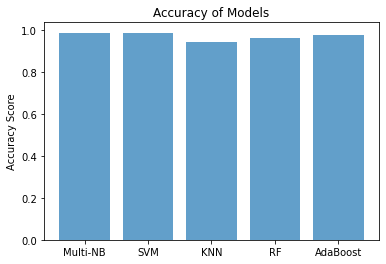

In [25]:
y_pos = np.arange(len(objects))
y_val = [ x for x in acc_score]
plt.bar(y_pos,y_val, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()